#### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### Import the data

In [2]:
cc_origin = pd.read_csv('datasets_49737_90340_CC GENERAL.csv')
cc_origin.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Data Preparation

1. Basic Data Exploration

Basic data exploration on the original dataset is done, e.g. data size, metadata, statistics of the dataset

In [3]:
cc_origin.shape

(8950, 18)

In [4]:
cc_origin.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
cc_origin.describe(include = 'all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


2. Null Value Handling

Null values on 'CREDIT_LIMIT' & 'MINIMUM_PAYMENTS' are found. We copy the original dataset and handle it case by case

In [6]:
cc_dataprep = cc_origin.copy()

i. CREDIT_LIMIT; 1 record is found. since it is impossible to have 0/null credit limit. It is reasonable to say it is a record with error and we decide to remove the record

In [7]:
cc_dataprep.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

ii. MINIMUM_PAYMENTS; 313 records (3.4% of total records). Investigation is done and we found that there is no record with MINIMUM_PAYMENTS = 0, while most records are with PAYMENTS = 0. It is reasonable to assume that these records have 0 minimum payments and we decide to fill in na with 0

In [8]:
print(cc_dataprep[cc_dataprep.MINIMUM_PAYMENTS == 0].shape)
print(cc_dataprep[(cc_dataprep.PAYMENTS == 0) & (cc_dataprep.MINIMUM_PAYMENTS.isnull() == True)].shape)
print(cc_dataprep[(cc_dataprep.PAYMENTS != 0) & (cc_dataprep.MINIMUM_PAYMENTS.isnull() == True)].shape)

(0, 18)
(240, 18)
(73, 18)


In [9]:
cc_dataprep.fillna(value = {'MINIMUM_PAYMENTS':0}, inplace = True)

Let's check again the metadata of the modified dataset

In [10]:
cc_dataprep.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8949 non-null object
BALANCE                             8949 non-null float64
BALANCE_FREQUENCY                   8949 non-null float64
PURCHASES                           8949 non-null float64
ONEOFF_PURCHASES                    8949 non-null float64
INSTALLMENTS_PURCHASES              8949 non-null float64
CASH_ADVANCE                        8949 non-null float64
PURCHASES_FREQUENCY                 8949 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8949 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8949 non-null float64
CASH_ADVANCE_FREQUENCY              8949 non-null float64
CASH_ADVANCE_TRX                    8949 non-null int64
PURCHASES_TRX                       8949 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8949 non-null float64
MINIMUM_PAYMENTS            

#### Data Exploration

1. Feature enrichment

Before exploring different variables, more features are enriched by deriving from the dataset based on i) domain knowledge of business and model; ii) business requirement

In [11]:
cc_dataexpl = cc_dataprep.copy()

i. Domain Knowledge; RFM (Recency, Frequency, Monetary Value) segmentation allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior. Here we derive to enrich the features for RFM segementation

Recency: since the dataset has no information on the recency of card spending. It is not included in this case

Frequency: we define it as the monthly average number of transactions (purchases + cash advance). Similar derivation is applied to purchases only and cash advance only too.

In [12]:
cc_dataexpl['TOTAL_SPENT_TRX'] = cc_dataexpl.PURCHASES_TRX + cc_dataexpl.CASH_ADVANCE_TRX
cc_dataexpl['AVG_TOTAL_SPENT_TRX'] = cc_dataexpl.TOTAL_SPENT_TRX / cc_dataexpl.TENURE
cc_dataexpl['AVG_PURCHASES_TRX'] = cc_dataexpl.PURCHASES_TRX / cc_dataexpl.TENURE
cc_dataexpl['AVG_CASH_ADVANCE_TRX'] = cc_dataexpl.CASH_ADVANCE_TRX / cc_dataexpl.TENURE

In [13]:
# Checking
print(cc_dataexpl[cc_dataexpl['TOTAL_SPENT_TRX'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_TOTAL_SPENT_TRX'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_PURCHASES_TRX'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_CASH_ADVANCE_TRX'].isnull()].shape)

(0, 22)
(0, 22)
(0, 22)
(0, 22)


Monetary Value: we define it as the average amount per transaction (purchases + cash advance). Similar derivation is applied to purchases only and cash advance only too.

In [14]:
cc_dataexpl['TOTAL_SPENT'] = cc_dataexpl.PURCHASES + cc_dataexpl.CASH_ADVANCE
cc_dataexpl['AVG_TOTAL_SPENT'] = cc_dataexpl.TOTAL_SPENT / cc_dataexpl.TOTAL_SPENT_TRX
cc_dataexpl['AVG_PURCHASES'] = cc_dataexpl.PURCHASES / cc_dataexpl.PURCHASES_TRX
cc_dataexpl['AVG_CASH_ADVANCE'] = cc_dataexpl.CASH_ADVANCE / cc_dataexpl.CASH_ADVANCE_TRX

In [15]:
# Checking
print(cc_dataexpl[cc_dataexpl['TOTAL_SPENT'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_TOTAL_SPENT'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_TOTAL_SPENT'] == np.inf].shape)
print(cc_dataexpl[cc_dataexpl['AVG_PURCHASES'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_PURCHASES'] == np.inf].shape)
print(cc_dataexpl[cc_dataexpl['AVG_CASH_ADVANCE'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['AVG_CASH_ADVANCE'] == np.inf].shape)

(0, 26)
(1, 26)
(3, 26)
(2040, 26)
(3, 26)
(4628, 26)
(0, 26)


In general, the nan & inf values are caused by i. both nominator & denominator (e.g. PURCHASES & PURCHASES_TRX) are 0, and ii. only denominator is 0 respecticely. We decide to i. fill na with 0, and ii. drop the records with inf as they are likely with error 

In [16]:
cc_dataexpl.fillna(value = {'AVG_TOTAL_SPENT':0, 'AVG_PURCHASES':0, 'AVG_CASH_ADVANCE':0}, inplace = True)
cc_dataexpl = cc_dataexpl.replace({v: [np.inf, -np.inf] for v in ['AVG_TOTAL_SPENT', 'AVG_PURCHASES']}, np.nan)
cc_dataexpl.dropna(subset = ['AVG_TOTAL_SPENT', 'AVG_PURCHASES'], inplace = True)

In [17]:
cc_dataexpl.shape

(8946, 26)

ii. Business Requirement; From the requirement note (datasets_49737_90340_CREDIT CARD - SEGMENTATION CASE STUDY.pdf), we can see there are specified intelligent APIs that can be used as the clustering features

Monthly average purchase and cash advance amount

In [18]:
cc_dataexpl['MTH_AVG_TOTAL_SPENT'] = cc_dataexpl.TOTAL_SPENT / cc_dataexpl.TENURE
cc_dataexpl['MTH_AVG_PURCHASES'] = cc_dataexpl.PURCHASES / cc_dataexpl.TENURE
cc_dataexpl['MTH_AVG_CASH_ADVANCE'] = cc_dataexpl.CASH_ADVANCE / cc_dataexpl.TENURE

In [19]:
# Checking
print(cc_dataexpl[cc_dataexpl['MTH_AVG_TOTAL_SPENT'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['MTH_AVG_PURCHASES'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['MTH_AVG_CASH_ADVANCE'].isnull()].shape)

(0, 29)
(0, 29)
(0, 29)


Purchase by type; we decide to apply one_off purchases over total purchases ratio since purchases should be equal to sum of one-off purchases and installments purchases. Same as above, we will check on this logic, and check if there is nan or inf value on the new feature.

Some records that violates the rule "PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES". We will drop them and continue to derive the new features

In [20]:
cc_dataexpl[(cc_dataexpl.PURCHASES - cc_dataexpl.ONEOFF_PURCHASES - cc_dataexpl.INSTALLMENTS_PURCHASES).abs() > 1e-6].shape
cc_dataexpl = cc_dataexpl[(cc_dataexpl.PURCHASES - cc_dataexpl.ONEOFF_PURCHASES - cc_dataexpl.INSTALLMENTS_PURCHASES).abs() < 1e-6]

In [21]:
cc_dataexpl['ONEOFF_PUR_TO_PURCHASES_RATIO'] = cc_dataexpl.ONEOFF_PURCHASES / cc_dataexpl.PURCHASES
cc_dataexpl.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,AVG_PURCHASES_TRX,AVG_CASH_ADVANCE_TRX,TOTAL_SPENT,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE,ONEOFF_PUR_TO_PURCHASES_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.166667,0.000000,95.400000,47.700000,47.700000,0.000000,7.950000,7.950000,0.000000,0.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.000000,0.333333,6442.945483,1610.736371,0.000000,1610.736371,536.912124,0.000000,536.912124,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,773.170000,64.430833,64.430833,0.000000,64.430833,64.430833,0.000000,1.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.083333,0.083333,1704.788017,852.394009,1499.000000,205.788017,142.065668,124.916667,17.149001,1.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.083333,0.000000,16.000000,16.000000,16.000000,0.000000,1.333333,1.333333,0.000000,1.0


In [22]:
# Checking
print(cc_dataexpl[cc_dataexpl['ONEOFF_PUR_TO_PURCHASES_RATIO'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['ONEOFF_PUR_TO_PURCHASES_RATIO'] == np.inf].shape)

(2041, 30)
(0, 30)


In [23]:
cc_dataexpl.fillna(value = {'ONEOFF_PUR_TO_PURCHASES_RATIO':0}, inplace = True)

Limit usage

In [24]:
cc_dataexpl['BALANCE_TO_CREDIT_RATIO'] = cc_dataexpl.BALANCE / cc_dataexpl.CREDIT_LIMIT

In [25]:
# Checking
print(cc_dataexpl[cc_dataexpl['BALANCE_TO_CREDIT_RATIO'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['BALANCE_TO_CREDIT_RATIO'] == np.inf].shape)

(0, 31)
(0, 31)


Minimum payments to payments ratio

In [26]:
cc_dataexpl['MIN_PAY_TO_PAYMENTS_RATIO'] = cc_dataexpl.MINIMUM_PAYMENTS / cc_dataexpl.PAYMENTS

In [27]:
# Checking
print(cc_dataexpl[cc_dataexpl['MIN_PAY_TO_PAYMENTS_RATIO'].isnull()].shape)
print(cc_dataexpl[cc_dataexpl['MIN_PAY_TO_PAYMENTS_RATIO'] == np.inf].shape)

(240, 32)
(0, 32)


In [28]:
cc_dataexpl.fillna(value = {'MIN_PAY_TO_PAYMENTS_RATIO':0}, inplace = True)

Let's look at the metadata of the enriched dataset. Indeed nan & inf values were found after the enrichment. They are handled above iteratively until the dataset is good to be used.

In [29]:
cc_dataexpl.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8928 entries, 0 to 8949
Data columns (total 32 columns):
CUST_ID                             8928 non-null object
BALANCE                             8928 non-null float64
BALANCE_FREQUENCY                   8928 non-null float64
PURCHASES                           8928 non-null float64
ONEOFF_PURCHASES                    8928 non-null float64
INSTALLMENTS_PURCHASES              8928 non-null float64
CASH_ADVANCE                        8928 non-null float64
PURCHASES_FREQUENCY                 8928 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8928 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8928 non-null float64
CASH_ADVANCE_FREQUENCY              8928 non-null float64
CASH_ADVANCE_TRX                    8928 non-null int64
PURCHASES_TRX                       8928 non-null int64
CREDIT_LIMIT                        8928 non-null float64
PAYMENTS                            8928 non-null float64
MINIMUM_PAYMENTS            

2. Variables exploration

Let's look at the statistics of the enriched dataset which can describe the card usage behaviours

In [30]:
cc_dataexpl.describe(include = 'all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TOTAL_SPENT,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE,ONEOFF_PUR_TO_PURCHASES_RATIO,BALANCE_TO_CREDIT_RATIO,MIN_PAY_TO_PAYMENTS_RATIO
count,8928,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,...,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000
unique,8928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1565.362871,0.877428,1003.964186,593.372506,410.591680,980.422367,0.490285,0.202817,0.364207,...,1984.386553,206.250972,73.906303,209.238077,175.362469,86.238710,89.123759,0.379887,0.388993,1.636539
std,NaN,2081.250400,0.236727,2138.275012,1661.452739,903.229756,2098.952396,0.401435,0.298555,0.397411,...,2918.131720,446.680376,160.574651,536.187303,258.467100,180.649717,193.309358,0.425557,0.389717,18.513696
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,128.545654,0.888889,39.405000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,...,364.930573,43.745767,11.997500,0.000000,31.560172,3.342625,0.000000,0.000000,0.041552,0.142469
50%,NaN,873.942013,1.000000,361.280000,39.000000,88.915000,0.000000,0.500000,0.083333,0.166667,...,1068.065000,85.545902,41.475000,0.000000,92.862083,31.936667,0.000000,0.112479,0.303106,0.426694
75%,NaN,2057.408524,1.000000,1111.567500,579.017500,466.865000,1115.893926,0.916667,0.300000,0.750000,...,2514.447500,198.148883,78.780056,247.488382,219.875119,97.401042,99.150555,0.874207,0.717241,1.025210


i. Monthly average transaction amount

In [31]:
cc_dataexpl[['MTH_AVG_TOTAL_SPENT', 'MTH_AVG_PURCHASES', 'MTH_AVG_CASH_ADVANCE']].describe()

,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE
count,8928.000000,8928.000000,8928.000000
mean,175.362469,86.238710,89.123759
std,258.467100,180.649717,193.309358
min,0.000000,0.000000,0.000000
25%,31.560172,3.342625,0.000000
50%,92.862083,31.936667,0.000000
75%,219.875119,97.401042,99.150555
max,4133.144740,4086.630833,3928.100980


Text(0,0.5,'Frequency')

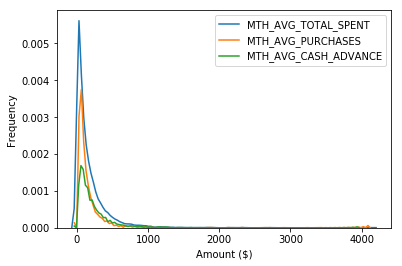

In [32]:
xlabels = ['MTH_AVG_TOTAL_SPENT', 'MTH_AVG_PURCHASES', 'MTH_AVG_CASH_ADVANCE']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)

plt.legend()
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

ii. Monthly average transaction count

In [33]:
cc_dataexpl[['AVG_TOTAL_SPENT_TRX', 'AVG_PURCHASES_TRX', 'AVG_CASH_ADVANCE_TRX']].describe()

,AVG_TOTAL_SPENT_TRX,AVG_PURCHASES_TRX,AVG_CASH_ADVANCE_TRX
count,8928.000000,8928.000000,8928.000000
mean,1.551905,1.259212,0.292694
std,2.140137,2.091604,0.619476
min,0.000000,0.000000,0.000000
25%,0.372159,0.083333,0.000000
50%,0.916667,0.666667,0.000000
75%,1.833333,1.500000,0.333333
max,29.833333,29.833333,10.250000


Text(0,0.5,'Frequency')

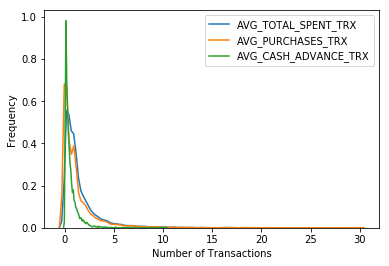

In [34]:
xlabels = ['AVG_TOTAL_SPENT_TRX', 'AVG_PURCHASES_TRX', 'AVG_CASH_ADVANCE_TRX']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)

plt.legend()
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')

iii. Average amount per transation

In [36]:
cc_dataexpl[['AVG_TOTAL_SPENT', 'AVG_PURCHASES', 'AVG_CASH_ADVANCE']].describe()

,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE
count,8928.000000,8928.000000,8928.000000
mean,206.250972,73.906303,209.238077
std,446.680376,160.574651,536.187303
min,0.000000,0.000000,0.000000
25%,43.745767,11.997500,0.000000
50%,85.545902,41.475000,0.000000
75%,198.148883,78.780056,247.488382
max,10590.411130,5981.666667,14836.451410


Text(0,0.5,'Frequency')

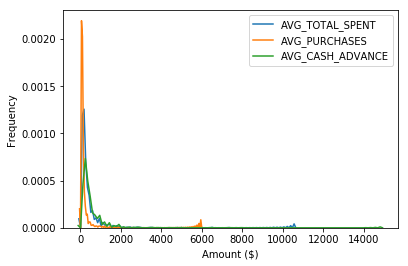

In [37]:
xlabels = ['AVG_TOTAL_SPENT', 'AVG_PURCHASES', 'AVG_CASH_ADVANCE']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    
plt.legend()
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

iv. Oneoff purchase to Total purchase ratio

In [38]:
cc_dataexpl[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','ONEOFF_PUR_TO_PURCHASES_RATIO']].describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PUR_TO_PURCHASES_RATIO
count,8928.000000,8928.000000,8928.000000,8928.000000
mean,1003.964186,593.372506,410.591680,0.379887
std,2138.275012,1661.452739,903.229756,0.425557
min,0.000000,0.000000,0.000000,0.000000
25%,39.405000,0.000000,0.000000,0.000000
50%,361.280000,39.000000,88.915000,0.112479
75%,1111.567500,579.017500,466.865000,0.874207
max,49039.570000,40761.250000,22500.000000,1.000000


Text(0,0.5,'Frequency')

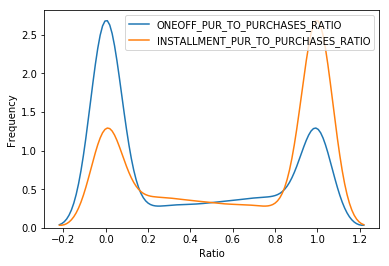

In [39]:
xlabels = ['ONEOFF_PUR_TO_PURCHASES_RATIO']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    sns.distplot(1 - cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = 'INSTALLMENT_PUR_TO_PURCHASES_RATIO')
    
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')

v. Balance To Credit Limit Ratio; 1 weird case is found with balance_to_credit_limit ratio > 15, which we expect the (monthly average) balance should be similar or lower than credit limit. Investigation is needed if it is a record with error, but we will include it for now

In [40]:
cc_dataexpl[['BALANCE', 'CREDIT_LIMIT', 'BALANCE_TO_CREDIT_RATIO']].describe()

,BALANCE,CREDIT_LIMIT,BALANCE_TO_CREDIT_RATIO
count,8928.000000,8928.000000,8928.000000
mean,1565.362871,4495.108438,0.388993
std,2081.250400,3638.710789,0.389717
min,0.000000,50.000000,0.000000
25%,128.545654,1600.000000,0.041552
50%,873.942013,3000.000000,0.303106
75%,2057.408524,6500.000000,0.717241
max,19043.138560,30000.000000,15.909951


Text(0,0.5,'Frequency')

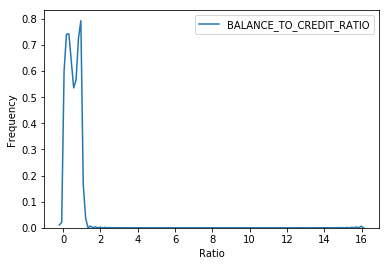

In [41]:
xlabels = ['BALANCE_TO_CREDIT_RATIO']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')

In [42]:
cc_dataexpl.sort_values(by = 'BALANCE_TO_CREDIT_RATIO', ascending = False)[['CUST_ID', 'BALANCE', 'CREDIT_LIMIT', 'BALANCE_TO_CREDIT_RATIO']].head(20)

,CUST_ID,BALANCE,CREDIT_LIMIT,BALANCE_TO_CREDIT_RATIO
6951,C17140,795.497557,50.0,15.909951
3469,C13566,348.813275,150.0,2.325422
567,C10591,3457.086184,1700.0,2.033580
8008,C18225,1718.885963,1000.0,1.718886
3145,C13235,1884.252524,1200.0,1.570210
2404,C12477,1553.505165,1000.0,1.553505
6438,C16614,1540.478248,1000.0,1.540478
7879,C18093,1381.080028,1000.0,1.381080
2774,C12853,2748.868773,2000.0,1.374434
7707,C17913,1322.647480,1000.0,1.322647


vi. Minimum Payments To Payments Ratio; Several cases are found with large min_pay_to_payments ratio. They commonly have low payments & credit limit but high minimum payments due. Investigation is needed if they are records with error, but we will include them for now

In [43]:
cc_dataexpl[['PAYMENTS', 'MINIMUM_PAYMENTS', 'MIN_PAY_TO_PAYMENTS_RATIO']].describe()

,PAYMENTS,MINIMUM_PAYMENTS,MIN_PAY_TO_PAYMENTS_RATIO
count,8928.000000,8928.000000,8928.000000
mean,1731.510847,834.390160,1.636539
std,2883.218678,2338.140249,18.513696
min,0.000000,0.000000,0.000000
25%,383.381582,163.111220,0.142469
50%,857.767711,289.717150,0.426694
75%,1903.672000,788.697284,1.025210
max,50721.483360,76406.207520,1369.069618


Text(0,0.5,'Frequency')

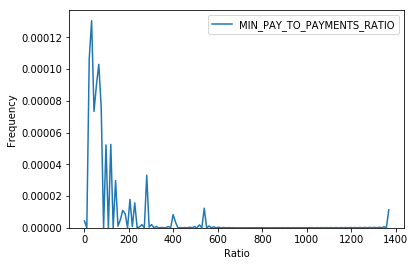

In [44]:
xlabels = ['MIN_PAY_TO_PAYMENTS_RATIO']

for xlabel in xlabels:
    sns.distplot(cc_dataexpl[xlabel], hist = False, kde = True, bins = 20, label = xlabel)
    
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')

In [45]:
cc_dataexpl.sort_values(by = 'MIN_PAY_TO_PAYMENTS_RATIO', ascending = False)[['CUST_ID','PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'MIN_PAY_TO_PAYMENTS_RATIO']].head(20)

,CUST_ID,PAYMENTS,MINIMUM_PAYMENTS,CREDIT_LIMIT,MIN_PAY_TO_PAYMENTS_RATIO
8732,C18969,0.049513,67.786744,500.0,1369.069618
4462,C14586,92.865469,50260.759470,5500.0,541.221188
5665,C15823,46.969049,18924.001990,3500.0,402.903665
2423,C12497,91.692752,26143.170490,3000.0,285.117089
78,C10082,29.278671,8242.687678,1200.0,281.525336
4942,C15081,27.832777,7751.321328,1200.0,278.496153
7837,C18050,58.892213,13333.794010,2500.0,226.410137
1683,C11738,128.371777,27146.026780,4000.0,211.464135
7132,C17325,302.484224,61031.618600,9000.0,201.767939
7349,C17548,77.991128,13916.702900,2500.0,178.439564


#### Feature Engineering

i. Principal Component Analysis

Before applying algorithm for clustering, we can study the correlations between features and reduce the large numbers of features into fewer number of distinct features using Principal Component Analysis

In [46]:
cc_dataengg = cc_dataexpl.copy()
pca_matrix = cc_dataengg.loc[:, cc_dataengg.columns != 'CUST_ID']
pca_matrix.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TOTAL_SPENT,AVG_TOTAL_SPENT,AVG_PURCHASES,AVG_CASH_ADVANCE,MTH_AVG_TOTAL_SPENT,MTH_AVG_PURCHASES,MTH_AVG_CASH_ADVANCE,ONEOFF_PUR_TO_PURCHASES_RATIO,BALANCE_TO_CREDIT_RATIO,MIN_PAY_TO_PAYMENTS_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,95.400000,47.700000,47.700000,0.000000,7.950000,7.950000,0.000000,0.0,0.040901,0.691320
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,6442.945483,1610.736371,0.000000,1610.736371,536.912124,0.000000,536.912124,0.0,0.457495,0.261353
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,773.170000,64.430833,64.430833,0.000000,64.430833,64.430833,0.000000,1.0,0.332687,1.008388
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1704.788017,852.394009,1499.000000,205.788017,142.065668,124.916667,17.149001,1.0,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,16.000000,16.000000,16.000000,0.000000,1.333333,1.333333,0.000000,1.0,0.681429,0.360871


In [47]:
pca = PCA()
pca_samples = pca.fit_transform(pca_matrix)
pca_samples

array([[-4.60843634e+03,  1.41259916e+03,  1.43741553e+02, ...,
         5.24093119e-13,  7.60467018e-12,  1.09258212e-11],
       [ 5.98467663e+03, -9.36571264e+02,  4.15844800e+03, ...,
        -2.83358988e-12, -4.69526876e-13,  1.29125097e-12],
       [ 3.98708561e+02, -3.09642241e+03, -1.83551224e+03, ...,
        -2.20408578e-13, -3.46411002e-12,  6.33387984e-12],
       ...,
       [-4.63071400e+03,  1.41735687e+03,  9.25423434e+01, ...,
        -1.23187300e-13, -1.45448753e-13,  1.08607947e-13],
       [-5.01539980e+03,  1.66736757e+03,  3.43123273e+02, ...,
        -3.61987277e-14,  9.46355281e-14, -1.50212621e-13],
       [-3.38172030e+03,  2.09440984e+03, -1.86743709e+02, ...,
         2.07705245e-13, -2.47495338e-13, -2.64846527e-14]])

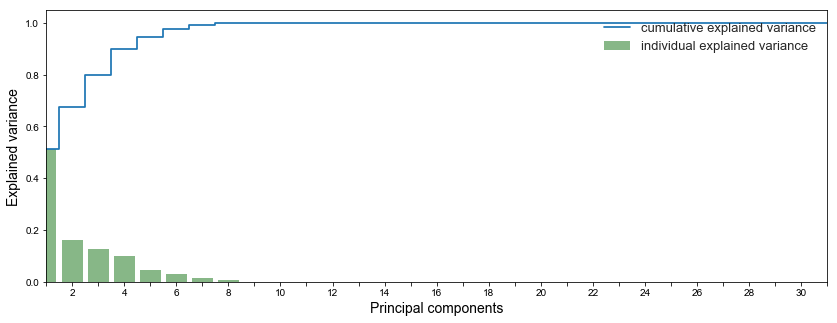

In [48]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.set(font_scale = 1)
plt.step(range(pca_matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid',
         label = 'cumulative explained variance')
sns.barplot(np.arange(1, pca_matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label = 'individual explained variance')
plt.xlim(0, 30)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc = 'upper right', fontsize = 13);

We can see that the number of components to explain ~ 100% of the variance is 7. We can therefore keep these 7 components and apply them in the clustering algorithms.


In [49]:
pca = PCA(n_components = 7)
cc_dataengg_af_pca = pca.fit_transform(pca_matrix)
cc_dataengg_af_pca = pd.DataFrame(cc_dataengg_af_pca)
cc_dataengg_af_pca

,0,1,2,3,4,5,6
0,-4608.436340,1412.599158,143.741553,-101.339346,42.504305,18.153024,-50.168564
1,5984.676626,-936.571264,4158.447999,-3613.434645,-266.339654,1302.673493,-262.075562
2,398.708561,-3096.422410,-1835.512241,469.481099,-260.747780,-512.044196,-497.681493
3,747.018902,-2299.497621,-2524.567330,48.768770,-1213.740399,533.862753,-817.648346
4,-4151.112832,1162.782492,386.268591,-9.484419,183.216641,-715.949472,-126.346950
5,-1873.116868,1383.629979,1208.796963,2050.770966,5.593857,-542.698992,1121.243900
6,11894.227975,941.607445,-7140.863220,1141.940526,108.014154,1869.659820,-1984.292586
7,-2920.178389,376.322198,276.774161,398.553995,-278.871848,-1061.206028,323.811176
8,-171.507503,-2229.838812,-2217.388183,70.031967,196.042571,481.036749,-300.058747
9,2395.805007,-4174.379955,-4395.760011,-289.498002,957.246773,1781.709825,-866.789193


#### Clustering Customers

In [50]:
cc_dataclus = cc_dataengg_af_pca.copy()

In [51]:
for n_cluster in range(2, 10):
    kmean = KMeans(init = 'k-means++', n_clusters = n_cluster, n_init = 30)
    clusters = kmean.fit_predict(cc_dataclus)
    avg_silhouette_score = silhouette_score(cc_dataclus, clusters)
    print('n_clusters = ', n_cluster, '; avg_silhouette_score = ', avg_silhouette_score)

n_clusters =  2 ; avg_silhouette_score =  0.5467817725716075
n_clusters =  3 ; avg_silhouette_score =  0.47062112376209897
n_clusters =  4 ; avg_silhouette_score =  0.3842211862179526
n_clusters =  5 ; avg_silhouette_score =  0.39289053794757445
n_clusters =  6 ; avg_silhouette_score =  0.3808486020973399
n_clusters =  7 ; avg_silhouette_score =  0.39115478757087735
n_clusters =  8 ; avg_silhouette_score =  0.36545522466495584
n_clusters =  9 ; avg_silhouette_score =  0.35128720544611935
